In [1]:
#load model and testing data
from tensorflow import keras
import pickle
from keras.utils import to_categorical

model = keras.models.load_model('../model_arthur/models/premodel_with_half_batch_1.h5')

with open('../model_arthur/data/test_img.pickle', 'rb') as f:
    X_test, y_test = pickle.load(f)

2024-06-21 13:35:52.977818: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
X_test.shape, y_test.shape

((38, 512, 512, 3), (38,))

In [5]:
import numpy as np
from keras.utils import to_categorical
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import classification_report

print(classification_report(np.argmax(to_categorical(y_test), axis=1), predicted_classes))

2/2 ━━━━━━━━━━━━━━━━━━━━ 74s 9s/step 
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.57      0.36      0.44        11

    accuracy                           0.74        38
   macro avg       0.67      0.63      0.64        38
weighted avg       0.72      0.74      0.72        38



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


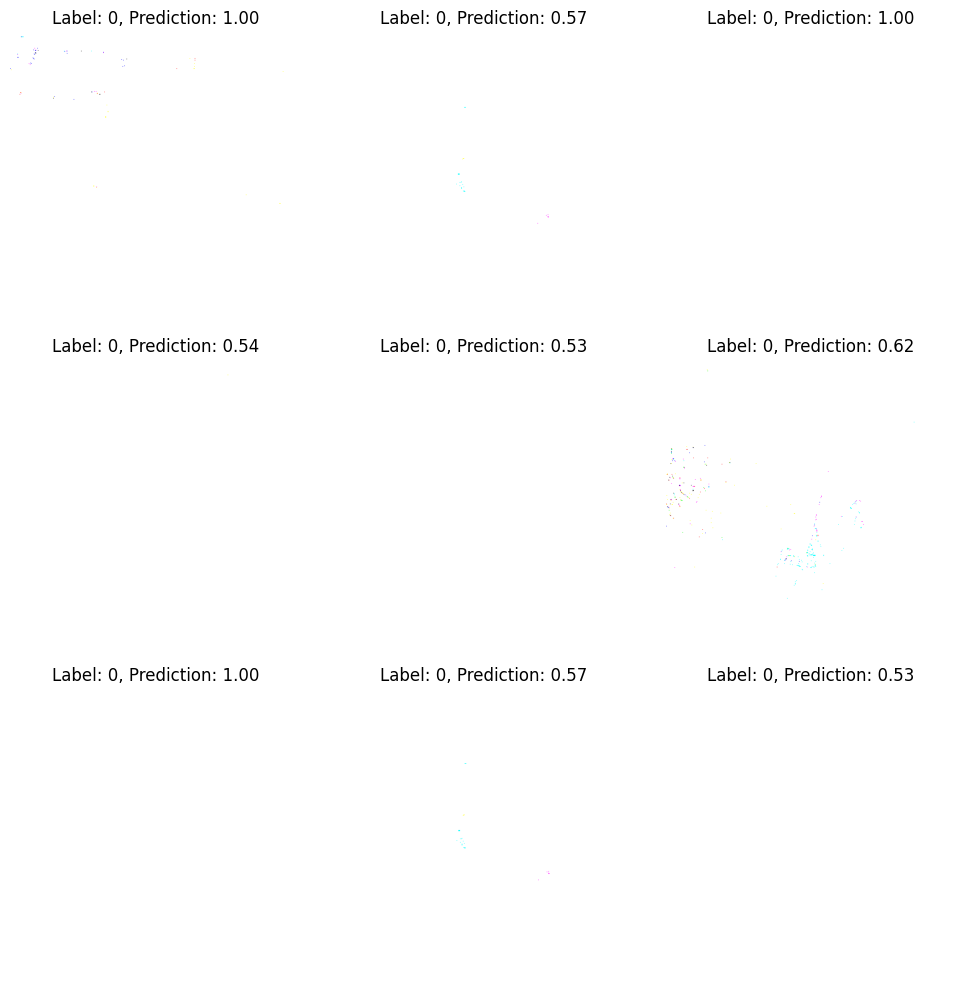

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_test, y_test, and predicted_classes are defined and accessible in this cell
X_test = X_test.astype(np.float32)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[idx])
    ax.set_title(f"Label: {y_test[idx]}, Prediction: {model.predict(X_test[idx][np.newaxis, ...])[0][0]:.2f}")
    ax.axis('off')
plt.tight_layout()
plt.show()